In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
from mlxtend.plotting import plot_decision_regions

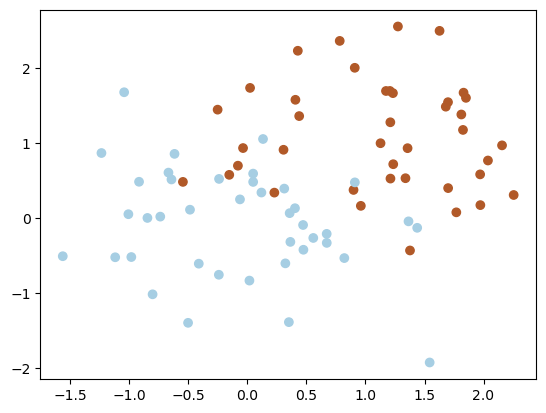

In [3]:
centers = ([0, 0], [1, 1])
X_train, y_train = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
X_test, y_test = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
# Plotting
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

In [4]:
my_first_neural_net = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),                                         
    layers.Dense(units=10, activation="relu"),
    layers.Dense(units=10, activation="relu"),
    layers.Dense(units=1, activation="sigmoid", name="output")
])

In [5]:
my_first_neural_net.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
my_first_neural_net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
                                  loss= tf.keras.losses.binary_crossentropy, 
                                  metrics=['accuracy'])

In [7]:
history = my_first_neural_net.fit(X_train, y_train, epochs=5000, verbose=2)

Epoch 1/5000
3/3 - 1s - 187ms/step - accuracy: 0.6875 - loss: 0.6651
Epoch 2/5000
3/3 - 0s - 12ms/step - accuracy: 0.6750 - loss: 0.6304
Epoch 3/5000
3/3 - 0s - 14ms/step - accuracy: 0.7250 - loss: 0.6044
Epoch 4/5000
3/3 - 0s - 11ms/step - accuracy: 0.7375 - loss: 0.5822
Epoch 5/5000
3/3 - 0s - 11ms/step - accuracy: 0.7625 - loss: 0.5596
Epoch 6/5000
3/3 - 0s - 15ms/step - accuracy: 0.7875 - loss: 0.5371
Epoch 7/5000
3/3 - 0s - 16ms/step - accuracy: 0.7875 - loss: 0.5157
Epoch 8/5000
3/3 - 0s - 20ms/step - accuracy: 0.7875 - loss: 0.4943
Epoch 9/5000
3/3 - 0s - 18ms/step - accuracy: 0.8125 - loss: 0.4756
Epoch 10/5000
3/3 - 0s - 18ms/step - accuracy: 0.8250 - loss: 0.4586
Epoch 11/5000
3/3 - 0s - 16ms/step - accuracy: 0.8625 - loss: 0.4422
Epoch 12/5000
3/3 - 0s - 14ms/step - accuracy: 0.8750 - loss: 0.4257
Epoch 13/5000
3/3 - 0s - 13ms/step - accuracy: 0.8750 - loss: 0.4128
Epoch 14/5000
3/3 - 0s - 11ms/step - accuracy: 0.8750 - loss: 0.3982
Epoch 15/5000
3/3 - 0s - 13ms/step - accur

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 891us/step


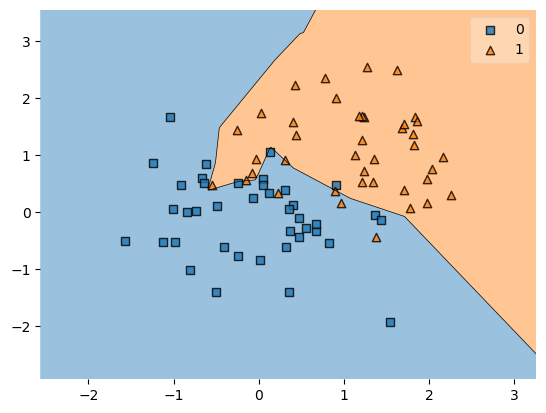

In [8]:
plot_decision_regions(X_train, y_train, clf=my_first_neural_net)
plt.show()

In [9]:
my_first_neural_net.evaluate(X_train, y_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9234 - loss: 0.1749  


[0.15538081526756287, 0.925000011920929]

In [10]:
my_first_neural_net.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8406 - loss: 0.5661  


[0.7289408445358276, 0.8374999761581421]

In [11]:
#Use L2 regularization and dropout to reduce the variance (overfitting) in the classifier. The final aim is to reduce the gap between the training and the testing accuracy.

my_first_neural_net = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),                                         
    layers.Dense(units=10, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(units=10, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation="sigmoid", name="output")
])

In [12]:
my_first_neural_net.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
my_first_neural_net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                                    loss= tf.keras.losses.binary_crossentropy, 
                                    metrics=['accuracy'])


In [14]:
history = my_first_neural_net.fit(X_train, y_train, epochs=5000, verbose=2)

Epoch 1/5000
3/3 - 1s - 207ms/step - accuracy: 0.4875 - loss: 0.8822
Epoch 2/5000
3/3 - 0s - 11ms/step - accuracy: 0.5375 - loss: 0.8605
Epoch 3/5000
3/3 - 0s - 12ms/step - accuracy: 0.4875 - loss: 0.8558
Epoch 4/5000
3/3 - 0s - 12ms/step - accuracy: 0.4500 - loss: 0.8111
Epoch 5/5000
3/3 - 0s - 11ms/step - accuracy: 0.6000 - loss: 0.7533
Epoch 6/5000
3/3 - 0s - 12ms/step - accuracy: 0.7125 - loss: 0.7349
Epoch 7/5000
3/3 - 0s - 10ms/step - accuracy: 0.6500 - loss: 0.7343
Epoch 8/5000
3/3 - 0s - 11ms/step - accuracy: 0.5625 - loss: 0.7570
Epoch 9/5000
3/3 - 0s - 12ms/step - accuracy: 0.5750 - loss: 0.7451
Epoch 10/5000
3/3 - 0s - 13ms/step - accuracy: 0.5125 - loss: 0.7589
Epoch 11/5000
3/3 - 0s - 16ms/step - accuracy: 0.5875 - loss: 0.7666
Epoch 12/5000
3/3 - 0s - 13ms/step - accuracy: 0.6250 - loss: 0.7323
Epoch 13/5000
3/3 - 0s - 11ms/step - accuracy: 0.6125 - loss: 0.7221
Epoch 14/5000
3/3 - 0s - 11ms/step - accuracy: 0.6875 - loss: 0.7113
Epoch 15/5000
3/3 - 0s - 11ms/step - accur

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 965us/step


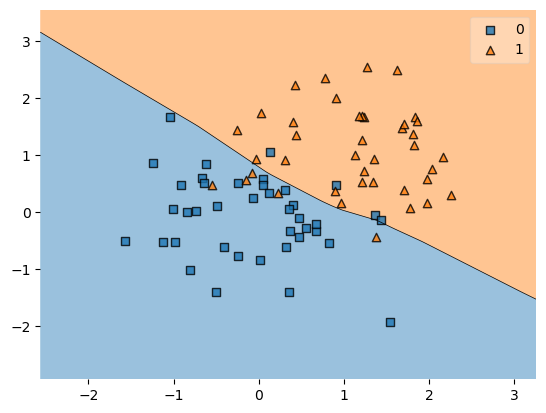

In [15]:
plot_decision_regions(X_train, y_train, clf=my_first_neural_net)
plt.show()

In [16]:
my_first_neural_net.evaluate(X_train, y_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8578 - loss: 0.2931  


[0.2722397446632385, 0.887499988079071]

In [17]:
my_first_neural_net.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8969 - loss: 0.3391 


[0.40024131536483765, 0.887499988079071]

## As you can see the accuracy gap between the train and test was reduced immensely!